In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IEOR 4212 Project/Datasets/data_to_map_revised.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/IEOR 4212 Project/Datasets/data_to_map_revised.csv'

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df['zip_code'] = df['zip_code'].astype(str).str.zfill(5)

In [ ]:
df

,zip_code,EVs on the road,first_three_digits,Region,proportion_load,Year,Month,EV,ev_load,timestamp
0,01001,244.834276,10,WCMA,0.008875,2025,1,14,0.124245,2025-01-01
1,01001,244.834276,10,WCMA,0.008875,2025,2,16,0.141994,2025-02-01
2,01001,244.834276,10,WCMA,0.008875,2025,3,15,0.133120,2025-03-01
3,01001,244.834276,10,WCMA,0.008875,2025,4,12,0.106496,2025-04-01
4,01001,244.834276,10,WCMA,0.008875,2025,5,9,0.079872,2025-05-01
...,...,...,...,...,...,...,...,...,...,...
449815,06907,243.651364,69,CT,0.003488,2045,8,615,2.145286,2045-08-01
449816,06907,243.651364,69,CT,0.003488,2045,9,640,2.232493,2045-09-01
449817,06907,243.651364,69,CT,0.003488,2045,10,841,2.933635,2045-10-01
449818,06907,243.651364,69,CT,0.003488,2045,11,1303,4.545216,2045-11-01


# Existing Charging Station Data

In [ ]:
charging_station = pd.read_csv('/content/drive/MyDrive/IEOR 4212 Project/Datasets/electric_stations.csv')

/tmp/ipython-input-2023043383.py:1: DtypeWarning: Columns (20,31,40,46,69,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  charging_station = pd.read_csv('/content/drive/MyDrive/IEOR 4212 Project/Datasets/electric_stations.csv')


In [ ]:
charging_station.dropna(subset=['ZIP'], inplace=True)


/tmp/ipython-input-3889060605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_station.dropna(subset=['ZIP'], inplace=True)


In [ ]:
charging_station['ZIP'] = charging_station['ZIP'].astype(int).astype(str).str.zfill(5)

/tmp/ipython-input-3234786516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_station['ZIP'] = charging_station['ZIP'].astype(int).astype(str).str.zfill(5)


In [ ]:
df['zip_code'].unique()

array(['01001', '01002', '01003', ..., '06905', '06906', '06907'],
      dtype=object)

In [ ]:
charging_station = charging_station[charging_station['ZIP'].isin(df['zip_code'].unique())]

In [ ]:
station_count = charging_station.groupby('ZIP')[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].sum()
station_count['Total Stations'] = station_count.sum(axis=1)

In [ ]:
station_count.drop(columns=['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'], inplace=True)

In [ ]:
station_count

,Total Stations
ZIP,
01001,36.0
01002,74.0
01003,45.0
01005,2.0
01007,10.0
...,...
06890,3.0
06897,8.0
06901,118.0


In [ ]:
station_count = station_count.reindex(df['zip_code'].unique(), fill_value=0)
station_count = station_count.sort_index()

In [ ]:
# dependency on other zipcodes = mean of nearby zipcode charging stations
station_count['dependency'] = (station_count['Total Stations'].shift(1) + station_count['Total Stations'].shift(-1)) / 2

In [ ]:
station_count.iloc[0, 1] = station_count.iloc[1, 1] / 2
station_count.iloc[-1, 1] = station_count.iloc[-2, 1] / 2

In [ ]:
start_date = '2025-01-01'
end_date = '2025-12-01'
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

max_load_df = filtered_df.groupby('zip_code')['ev_load'].max().reset_index()

In [ ]:
max_load_df

,zip_code,ev_load
0,01001,0.230741
1,01002,0.352992
2,01003,0.047680
3,01005,0.070708
4,01007,0.270459
...,...,...
1780,06902,0.431001
1781,06903,0.416574
1782,06905,0.317301
1783,06906,0.105481


In [ ]:
df[df['zip_code'] == '01002']

,zip_code,EVs on the road,first_three_digits,Region,proportion_load,Year,Month,EV,ev_load,timestamp
252,01002,374.55266,10,WCMA,0.013577,2025,1,14,0.190073,2025-01-01
253,01002,374.55266,10,WCMA,0.013577,2025,2,16,0.217226,2025-02-01
254,01002,374.55266,10,WCMA,0.013577,2025,3,15,0.203649,2025-03-01
255,01002,374.55266,10,WCMA,0.013577,2025,4,12,0.162919,2025-04-01
256,01002,374.55266,10,WCMA,0.013577,2025,5,9,0.122190,2025-05-01
...,...,...,...,...,...,...,...,...,...,...
499,01002,374.55266,10,WCMA,0.013577,2045,8,348,4.724663,2045-08-01
500,01002,374.55266,10,WCMA,0.013577,2045,9,336,4.561744,2045-09-01
501,01002,374.55266,10,WCMA,0.013577,2045,10,503,6.829039,2045-10-01
502,01002,374.55266,10,WCMA,0.013577,2045,11,672,9.123488,2045-11-01


In [ ]:
load_mapping = max_load_df.set_index('zip_code')['ev_load']
station_count['2025_base'] = station_count.index.map(load_mapping)

In [ ]:
station_count

,Total Stations,dependency,2025_base,total_capacity,ratio
ZIP,,,,,
01001,36.0,20.25,0.230741,46.125,199.899670
01002,74.0,40.50,0.352992,94.250,267.003152
01003,45.0,38.00,0.047680,64.000,1342.269395
01005,2.0,27.50,0.070708,15.750,222.745703
01007,10.0,1.00,0.270459,10.500,38.822947
...,...,...,...,...,...
06902,128.0,59.00,0.431001,157.500,365.428125
06903,0.0,79.50,0.416574,39.750,95.421277
06905,31.0,0.00,0.317301,31.000,97.698908


In [ ]:
# create three-way matrix
load_matrix = df.pivot(index='zip_code', columns='timestamp', values='ev_load')

In [ ]:
load_matrix

timestamp,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01,2025-07-01,2025-08-01,2025-09-01,2025-10-01,...,2045-03-01,2045-04-01,2045-05-01,2045-06-01,2045-07-01,2045-08-01,2045-09-01,2045-10-01,2045-11-01,2045-12-01
zip_code,,,,,,,,,,,,,,,,,,,,,
01001,0.124245,0.141994,0.133120,0.106496,0.079872,0.070997,0.079872,0.088746,0.088746,0.070997,...,6.718106,5.360285,3.185997,2.635769,2.564772,3.088376,2.981880,4.463946,5.963761,6.558362
01002,0.190073,0.217226,0.203649,0.162919,0.122190,0.108613,0.122190,0.135766,0.135766,0.108613,...,10.277500,8.200278,4.874006,4.032256,3.923643,4.724663,4.561744,6.829039,9.123488,10.033121
01003,0.025674,0.029342,0.027508,0.022006,0.016505,0.014671,0.016505,0.018339,0.018339,0.014671,...,1.388234,1.107653,0.658357,0.544657,0.529986,0.638184,0.616178,0.922433,1.232356,1.355225
01005,0.038074,0.043513,0.040793,0.032635,0.024476,0.021756,0.024476,0.027196,0.027196,0.021756,...,2.058703,1.642611,0.976320,0.807708,0.785951,0.946405,0.913771,1.367936,1.827541,2.009751
01007,0.145632,0.166436,0.156034,0.124827,0.093620,0.083218,0.093620,0.104023,0.104023,0.083218,...,7.874506,6.282961,3.734409,3.089469,3.006251,3.619984,3.495157,5.232334,6.990315,7.687266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06902,0.258601,0.249023,0.277756,0.162823,0.114934,0.153245,0.172401,0.162823,0.172401,0.114934,...,14.088954,12.048881,6.551220,7.231244,7.652668,5.890351,6.129796,8.054936,12.479882,13.715419
06903,0.249944,0.240687,0.268459,0.157372,0.111086,0.148115,0.166630,0.157372,0.166630,0.111086,...,13.617333,11.645551,6.331921,6.989182,7.396498,5.693175,5.924605,7.785301,12.062125,13.256303
06905,0.190381,0.183330,0.204483,0.119869,0.084614,0.112818,0.126921,0.119869,0.126921,0.084614,...,10.372230,8.870337,4.822981,5.323612,5.633863,4.336452,4.512731,5.930011,9.187638,10.097236


# Model for future projections

We don't only want to rely on the number of EV charging stations in a zipcode. We also want to account for number of charging stations in nearby zipcodes because those can have a spillover effect and account for some of the load.

In [ ]:
station_count.sort_index(inplace=True)
load_matrix = df.pivot(index='zip_code', columns='timestamp', values='ev_load').sort_index()

base_load = station_count['2025_base']
base_stations = station_count['Total Stations']
base_dependency = station_count['dependency']

# total capacity = how many station + dependency from nearby stations
spillover= 0.5
current_total_capacity = base_stations + (spillover * base_dependency)

In [ ]:
# Ratio: How much capacity is needed per unit of load
ratio = current_total_capacity / base_load
ratio = ratio.fillna(0)

In [ ]:
# Assuming charging stations improve annually by 0.5%
annual_improvement = 0.005
dates = pd.to_datetime(load_matrix.columns)
years_passed = (dates - dates[0]).days / 365

multiplier = (1 + annual_improvement) ** years_passed

In [ ]:
# Capacity needed at each time step
capacity_needed = load_matrix.multiply(ratio, axis=0)
capacity_needed = capacity_needed.divide(multiplier, axis=1)

In [ ]:
# dependency at each time step
prev_zip = capacity_needed.shift(1).fillna(0)
next_zip = capacity_needed.shift(-1).fillna(0)
dependency = (prev_zip + next_zip) / 2

In [ ]:
# number of charging ports that need to be built
total_local_needed = capacity_needed - (spillover*dependency)

# Subtract the number of charging ports we already have
additional_stations_needed = total_local_needed.subtract(base_stations, axis=0)

In [ ]:
# minimum = 0
additional_stations_needed = additional_stations_needed.clip(lower=0).round(0)
additional_stations_needed

timestamp,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01,2025-07-01,2025-08-01,2025-09-01,2025-10-01,...,2045-03-01,2045-04-01,2045-05-01,2045-06-01,2045-07-01,2045-08-01,2045-09-01,2045-10-01,2045-11-01,2045-12-01
zip_code,,,,,,,,,,,,,,,,,,,,,
01001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,209.0,159.0,79.0,59.0,56.0,75.0,70.0,123.0,175.0,195.0
01002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,652.0,503.0,267.0,207.0,199.0,253.0,240.0,395.0,550.0,609.0
01003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,352.0,271.0,142.0,109.0,104.0,134.0,127.0,211.0,296.0,329.0
01005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,41.0,20.0,15.0,14.0,19.0,18.0,32.0,45.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1210.0,1012.0,489.0,551.0,587.0,420.0,440.0,616.0,1019.0,1128.0
06903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,203.0,168.0,77.0,87.0,94.0,65.0,68.0,99.0,169.0,188.0


Above additional_stations_needed is how many charging ports we need in each zipcode by a certain date to satisfy total demand but we want to find the incremental difference. If x ports are installed at time y, then that might already satisfy the demand for a later time and no additional charging ports will need to be installed

In [ ]:
# incremental differences
# used ai for this code: difference between adjacent columns
install_schedule = additional_stations_needed.diff(axis=1)

# first month demand is met
install_schedule.iloc[:, 0] = 0

# we don't remove stations so we have to clip the minimum to 0
install_schedule = install_schedule.clip(lower=0)

# convert to whole number
install_schedule = install_schedule.round(0).astype(int)

In [ ]:
install_schedule.to_csv("proposed_solution.csv")

In [ ]:
install_schedule

timestamp,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01,2025-07-01,2025-08-01,2025-09-01,2025-10-01,...,2045-03-01,2045-04-01,2045-05-01,2045-06-01,2045-07-01,2045-08-01,2045-09-01,2045-10-01,2045-11-01,2045-12-01
zip_code,,,,,,,,,,,,,,,,,,,,,
01001,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,19,0,53,52,20
01002,0,0,0,0,0,0,0,0,0,0,...,21,0,0,0,0,54,0,155,155,59
01003,0,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,30,0,84,85,33
01005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01007,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,5,0,14,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06902,0,0,0,0,0,0,0,0,0,0,...,29,0,0,62,36,0,20,176,403,109
06903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06905,0,0,0,0,0,0,0,0,0,0,...,6,0,0,10,7,0,3,31,70,19


# Add install schedule to current ev charging port count and future added so at a given timestep, we know how many charging ports need to be in a given zipcode

In [ ]:
import pandas as pd

date_cols = install_schedule.columns
df_cumsum = install_schedule[date_cols].cumsum(axis=1)

# add initial count
df_total_capacity = df_cumsum.add(station_count['Total Stations'], axis=0)


In [ ]:
df_total_capacity


timestamp,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01,2025-07-01,2025-08-01,2025-09-01,2025-10-01,...,2045-03-01,2045-04-01,2045-05-01,2045-06-01,2045-07-01,2045-08-01,2045-09-01,2045-10-01,2045-11-01,2045-12-01
zip_code,,,,,,,,,,,,,,,,,,,,,
01001,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,...,1812.0,1812.0,1812.0,1812.0,1812.0,1831.0,1831.0,1884.0,1936.0,1956.0
01002,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,...,5511.0,5511.0,5511.0,5511.0,5511.0,5565.0,5565.0,5720.0,5875.0,5934.0
01003,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,2998.0,2998.0,2998.0,2998.0,2998.0,3028.0,3028.0,3112.0,3197.0,3230.0
01005,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
01007,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,477.0,477.0,477.0,477.0,477.0,482.0,482.0,496.0,509.0,515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06902,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,10355.0,10355.0,10355.0,10417.0,10453.0,10453.0,10473.0,10649.0,11052.0,11161.0
06903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06905,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,1776.0,1776.0,1776.0,1786.0,1793.0,1793.0,1796.0,1827.0,1897.0,1916.0


# Static visualizations in 5 year steps

In [ ]:
f = open("/content/drive/MyDrive/IEOR 4212 Project/Datasets/new_england_geojson.geojson", 'r')
content = f.read()

In [ ]:
import json
geojson_data = json.loads(content)

In [ ]:
date_cols = df_total_capacity.columns
for col in date_cols:
    df_total_capacity[col] = pd.to_numeric(df_total_capacity[col], errors='coerce')

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# AI suggested using geopandas with matplotlib
map = gpd.GeoDataFrame.from_features(geojson_data["features"])
map = map.rename(columns={'ZCTA5CE10': 'zip_code'})

In [ ]:
df_total_capacity.reset_index(inplace=True)

/tmp/ipython-input-416625889.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_total_capacity.reset_index(inplace=True)


In [ ]:
map['zip_code'] = map['zip_code'].astype(str)
df_total_capacity['zip_code'] = df_total_capacity['zip_code'].astype(str)

plot = map.merge(df_total_capacity, on='zip_code', how='left')

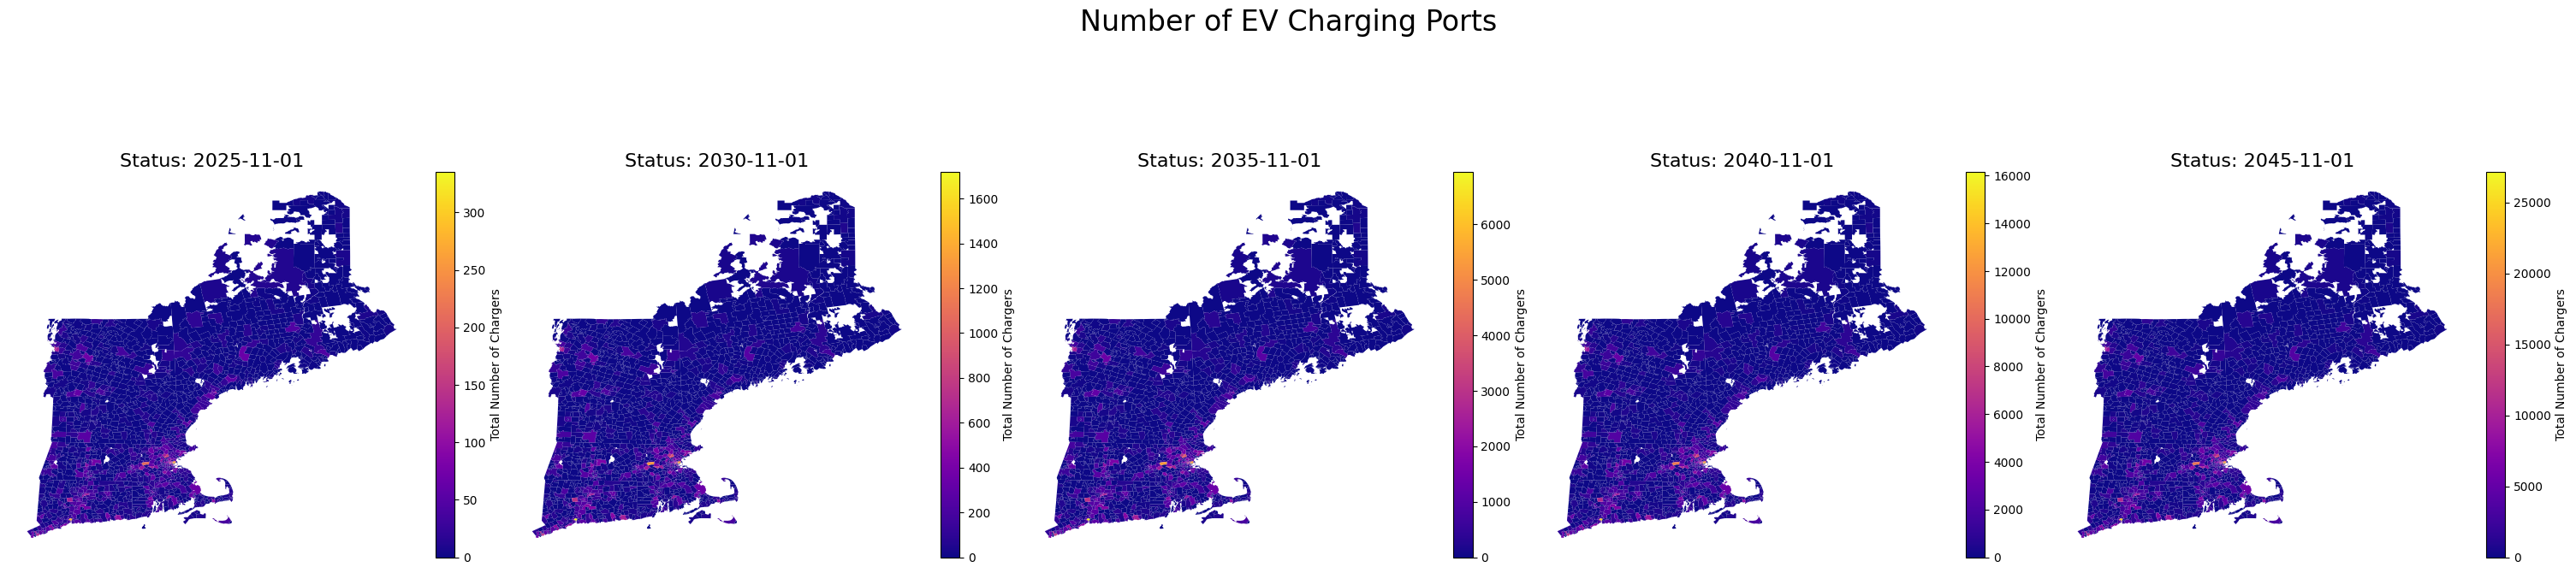

In [ ]:
snapshots = ['2025-11-01', '2030-11-01', '2035-11-01', '2040-11-01', '2045-11-01']

# AI Code for plotting
fig, axes = plt.subplots(1,5, figsize=(30,8), constrained_layout=True)

for ax, date_col in zip(axes, snapshots):
    plot.plot(
        column=date_col,
        ax=ax,
        legend=True,
        cmap='plasma',
        legend_kwds={'label': "Total Number of Chargers", 'shrink': 0.6}
    )

    ax.set_title(f'Status: {date_col}', fontsize=16)
    ax.axis('off')

plt.suptitle('Number of EV Charging Ports', fontsize=24)
plt.savefig('ev_charging_ports.png', dpi=300)
plt.show()

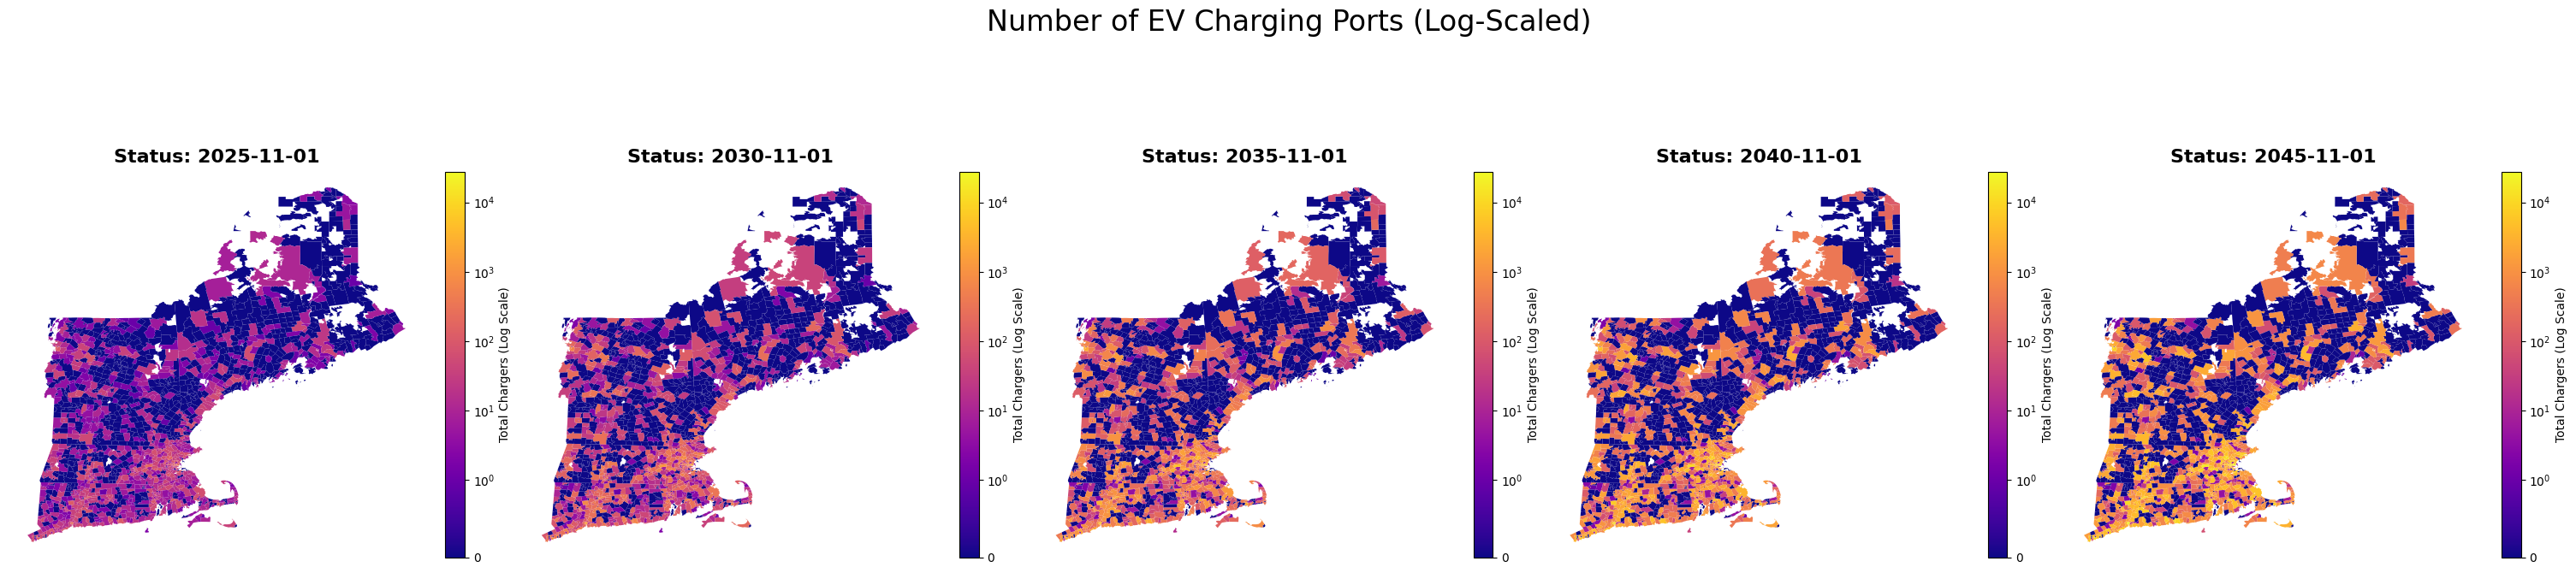

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

# Ai code for log scale map
fig, axes = plt.subplots(1, 5, figsize=(30, 8), constrained_layout=True)
vmax = plot[snapshots].max().max()

# because the data is skewed and hard to tell differences in above graph, we wanted to normalize
norm = SymLogNorm(linthresh=1, linscale=1, vmin=0, vmax=vmax)

for ax, date_col in zip(axes, snapshots):
    plot.plot(
        column=date_col,
        ax=ax,
        legend=True,
        cmap='plasma',
        norm=norm,
        legend_kwds={'label': "Total Chargers (Log Scale)", 'shrink': 0.6}
    )

    ax.set_title(f'Status: {date_col}', fontsize=16, fontweight='bold')
    ax.axis('off')

plt.suptitle('Number of EV Charging Ports (Log-Scaled)', fontsize=24)
plt.savefig('ev_charging_ports_log.png', dpi=300)
plt.show()